1. Download dataset

2. Load dataset

In [5]:
import pandas as pd
url = "https://drive.google.com/uc?export=download&id=190t0KiKqSdbFl-o_6r3S9Tvwo2mHzrcB"
data = pd.read_csv(url)

In [6]:
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


3. Perform visualizations

In [10]:
import matplotlib.pyplot as plt

    a. Univariate analysis

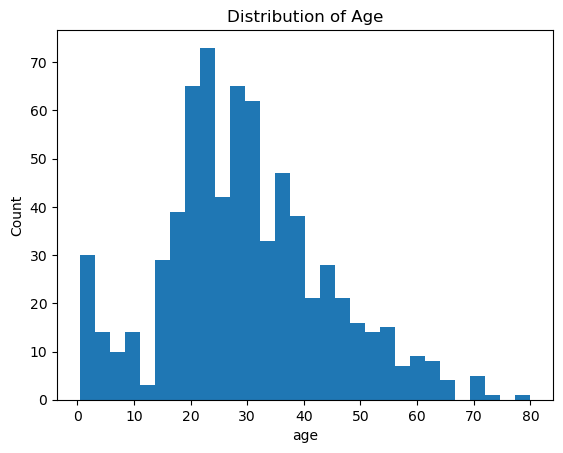

In [11]:
plt.hist(data["age"].dropna(), bins=30)
plt.xlabel("age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()


In [16]:
import seaborn as sns

    b. bivariate analysis

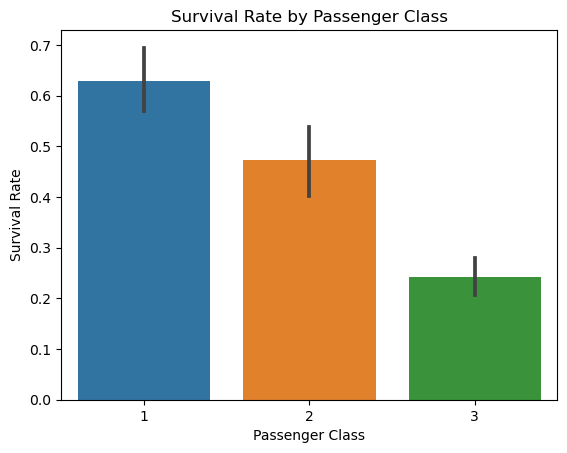

In [17]:
sns.barplot(x="pclass", y="survived", data=data)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.show()


    c. multivariate analysis

C:\Users\jayashree_m\AppData\Local\Temp\ipykernel_17344\1925180553.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


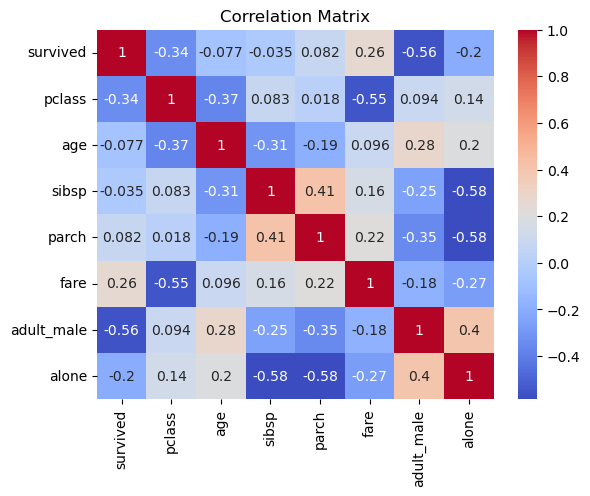

In [18]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

4. Perform descriptive statistics on the dataset

In [19]:
print(data.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


5. Handle missing values

In [20]:
print(data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


6.  Find the outliers and replace the outliers

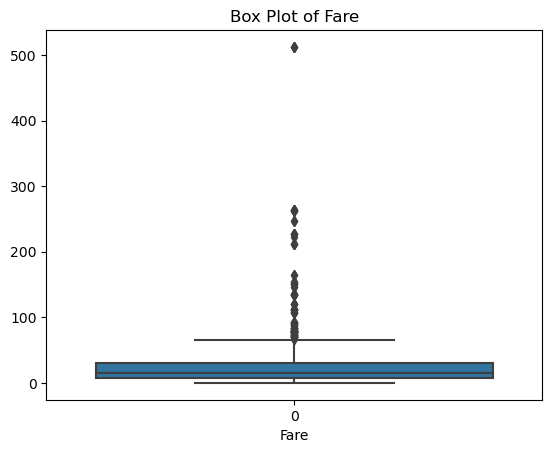

In [21]:
sns.boxplot(data["fare"])
plt.xlabel("Fare")
plt.title("Box Plot of Fare")
plt.show()


7. Check for Categorical columns and perform encoding

In [4]:
df = pd.DataFrame(data)
categorical_columns = df.select_dtypes(include= ['object']).columns
encoded_df = pd.get_dummies(df, columns = categorical_columns)
print(encoded_df)

     survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
0           0       3  22.0      1      0   7.2500        True  False   
1           1       1  38.0      1      0  71.2833       False  False   
2           1       3  26.0      0      0   7.9250       False   True   
3           1       1  35.0      1      0  53.1000       False  False   
4           0       3  35.0      0      0   8.0500        True   True   
..        ...     ...   ...    ...    ...      ...         ...    ...   
886         0       2  27.0      0      0  13.0000        True   True   
887         1       1  19.0      0      0  30.0000       False   True   
888         0       3   NaN      1      2  23.4500       False  False   
889         1       1  26.0      0      0  30.0000        True   True   
890         0       3  32.0      0      0   7.7500        True   True   

     sex_female  sex_male  ...  deck_C  deck_D  deck_E  deck_F  deck_G  \
0             0         1  ...       0       0   

8. Split the data into dependent and independent variables.

In [5]:
x = df.iloc[:, : -1]
y = df.iloc[:, -1]
print("Independent variables: ")
print(x)
print("Dependent variables: ")
print(y)

Independent variables: 
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck

9. Scale the independent variables

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
print("Scaled independent variables: ")
print(scaled_x)


ValueError: could not convert string to float: 'male'

10. Split the data into training and testing

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)
print("Training set: ")
print(x_train)
print(y_train)
print("Testing set: ")
print(x_test)
print(y_test)

Training set: 
     survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
650         0       3    male   NaN      0      0    7.8958        S   Third   
784         0       3    male  25.0      0      0    7.0500        S   Third   
125         1       3    male  12.0      1      0   11.2417        C   Third   
54          0       1    male  65.0      0      1   61.9792        C   First   
446         1       2  female  13.0      0      1   19.5000        S  Second   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
725         0       3    male  20.0      0      0    8.6625        S   Third   
607         1       1    male  27.0      0      0   30.5000        S   First   
544         0       1    male  50.0      1      0  106.4250        C   First   
643         1       3    male   NaN      0      0   56.4958        S   Third   
414         1       3    male  44.0      0      0    7.9250        S   Third   

       who  adult_male d